In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
## data = pd.read_csv('DanishFungi2020_train_metadata_DEV.csv')
## len_data = len(data)
%reload_ext autoreload
from Mush_Me.utils import log_progress

In [42]:
file = Data('mini_train')

file.get_clean_metadata(True)


/Users/hadrienmorand/code/hadri96/Mush_Me/Mush_Me/metadata.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_filtered = data[data['kingdom']=='Fungi']\


Index(['date', 'year', 'month', 'day', 'countryCode', 'taxonID',
       'scientificName', 'phylum', 'class', 'order', 'family', 'genus',
       'specificEpithet', 'species', 'ImageUniqueID', 'Substrate', 'Latitude',
       'Longitude', 'CoorUncert', 'Habitat', 'image_path', 'class_id',
       'genus_id', 'family_id'],
      dtype='object')
How many columns would like to keep? 3
Give a column name: species
Give a column name: Substrate
Give a column name: image_path


,species,Substrate,image_path
0,Mycena crocata,dead wood (including bark),2862684394-136762.jpg
1,Agaricus augustus,soil,2238502117-320693.jpg
2,Russula olivacea,soil,2818074328-59948.jpg
3,Boletus edulis,soil,2238560017-331396.jpg
4,Mycena pseudocorticola,bark,2237970493-5168.jpg
...,...,...,...
31206,Mycena capillaris,leaf or needle litter,2901951500-218743.jpg
31207,Russula vesca,soil,2238549985-179895.jpg
31208,Mycena tintinnabulum,wood,2238365543-13464.jpg
31209,Mycena rosea,soil,2883271427-366116.jpg


In [13]:
data

,species,Substrate,image_path
0,Mycena crocata,dead wood (including bark),2862684394-136762.jpg
1,Agaricus augustus,soil,2238502117-320693.jpg
2,Russula olivacea,soil,2818074328-59948.jpg
3,Boletus edulis,soil,2238560017-331396.jpg
4,Mycena pseudocorticola,bark,2237970493-5168.jpg
...,...,...,...
31206,Mycena capillaris,leaf or needle litter,2901951500-218743.jpg
31207,Russula vesca,soil,2238549985-179895.jpg
31208,Mycena tintinnabulum,wood,2238365543-13464.jpg
31209,Mycena rosea,soil,2883271427-366116.jpg


In [294]:
data.isnull().sum().sort_values(ascending=False)/len(data)

infraspecificEpithet    1.000000
CoorUncert              0.012991
identifiedBy            0.006499
Substrate               0.005136
level2Name              0.004107
level2Gid               0.004107
level1Name              0.004025
level1Gid               0.004025
level0Name              0.004025
level0Gid               0.004025
Habitat                 0.003661
order                   0.000589
locality                0.000267
class                   0.000109
species                 0.000109
eventDate               0.000060
day                     0.000060
month                   0.000060
year                    0.000060
image_url               0.000000
Longitude               0.000000
Latitude                0.000000
rightsHolder            0.000000
image_path              0.000000
class_id                0.000000
genus_id                0.000000
gbifID                  0.000000
ImageUniqueID           0.000000
taxonRank               0.000000
specificEpithet         0.000000
genus     

In [295]:
### Filtering the data based on the kingdom Fungi & CoorUncert small than 1000m

data_filtered = data[data['kingdom']=='Fungi']\
                    [data['CoorUncert']<1000].reset_index()

### Dropping the useless columns

data_filtered.drop(columns=['rightsHolder','image_url',
                   'identifiedBy','infraspecificEpithet',
                  'level0Gid','level0Name', 'level1Gid', 'level1Name', 
                   'level2Gid', 'level2Name','gbifID','kingdom','taxonRank','locality'], inplace=True)

<ipython-input-295-754c66328ccd>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [296]:
data_filtered.isnull().sum().sort_values(ascending=False)/len(data_filtered)

Substrate          0.005105
Habitat            0.003615
order              0.000599
class              0.000113
species            0.000113
year               0.000043
month              0.000043
day                0.000043
eventDate          0.000043
index              0.000000
genus_id           0.000000
class_id           0.000000
image_path         0.000000
CoorUncert         0.000000
Longitude          0.000000
Latitude           0.000000
genus              0.000000
ImageUniqueID      0.000000
specificEpithet    0.000000
family             0.000000
phylum             0.000000
scientificName     0.000000
taxonID            0.000000
countryCode        0.000000
family_id          0.000000
dtype: float64

In [297]:
### Drop the remaining na

data_filtered.dropna(inplace=True)

### Check that there is no null values left

data_filtered.isnull().sum().sort_values(ascending=False)/len(data_filtered)

data_filtered.reset_index(inplace=True)

In [298]:
### Rename the column eventDate to date

data_filtered = data_filtered.rename(columns={'eventDate':'date'})

### Turning the date object into a datetime object

data_filtered['date'] = pd.to_datetime(data_filtered['date'])

## Duplicates & outliers

In [299]:
l1 = len(data_filtered)

data_filtered.drop_duplicates(inplace=True)

l2 = len(data_filtered)

if l1-l2 == 0:
    print("There were no duplicates")
else:
    print("The duplicates were removed")

There were no duplicates


In [300]:
data_filtered.dtypes

level_0                     int64
index                       int64
date               datetime64[ns]
year                      float64
month                     float64
day                       float64
countryCode                object
taxonID                   float64
scientificName             object
phylum                     object
class                      object
order                      object
family                     object
genus                      object
specificEpithet            object
species                    object
ImageUniqueID              object
Substrate                  object
Latitude                  float64
Longitude                 float64
CoorUncert                float64
Habitat                    object
image_path                 object
class_id                    int64
genus_id                    int64
family_id                   int64
dtype: object

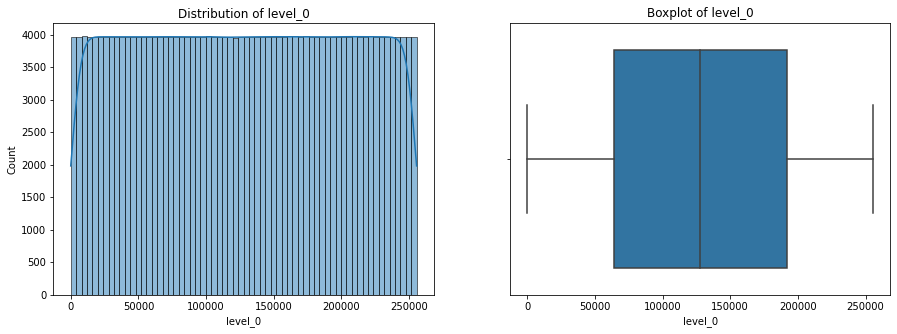

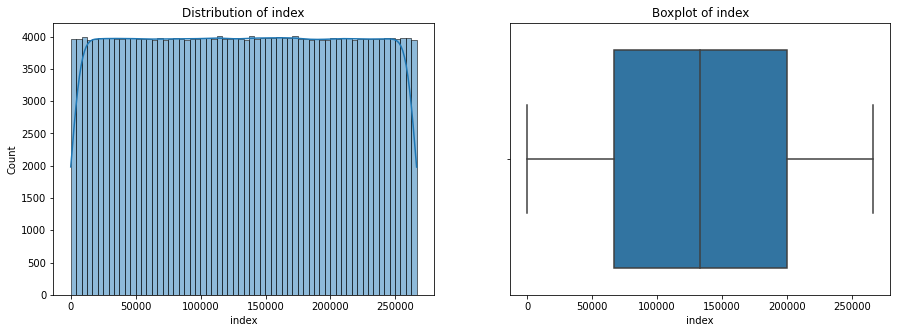

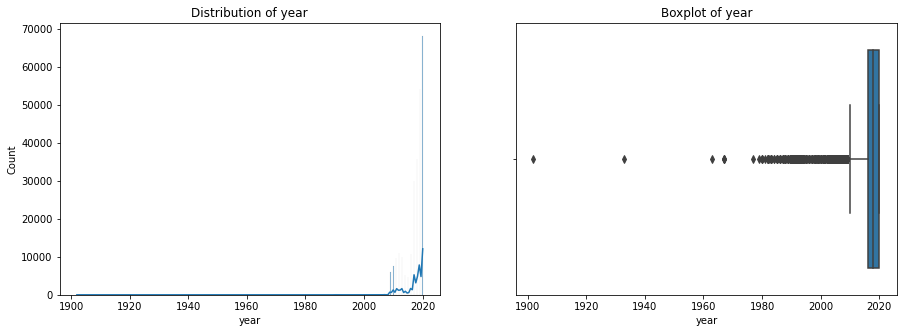

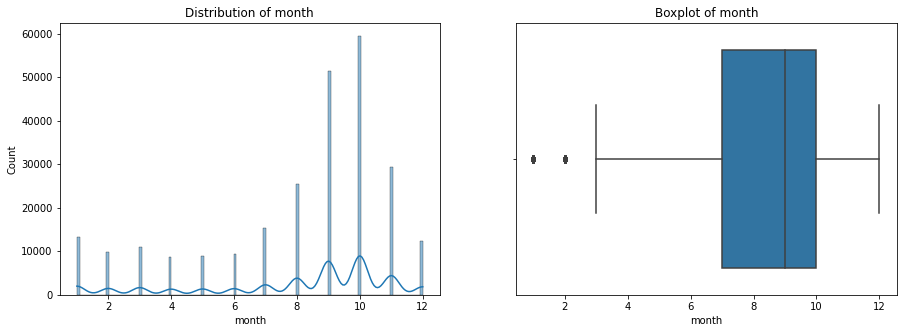

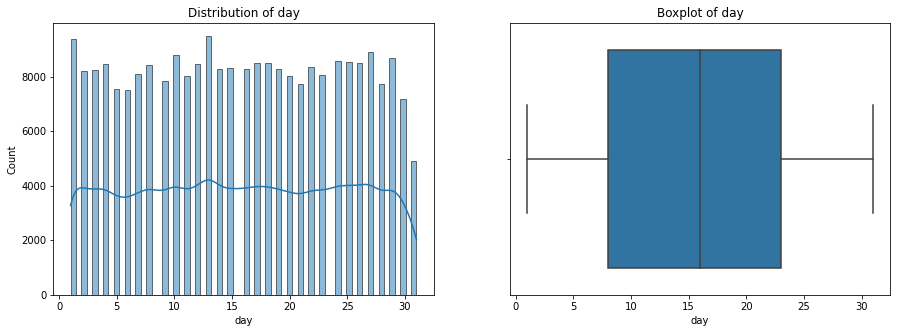

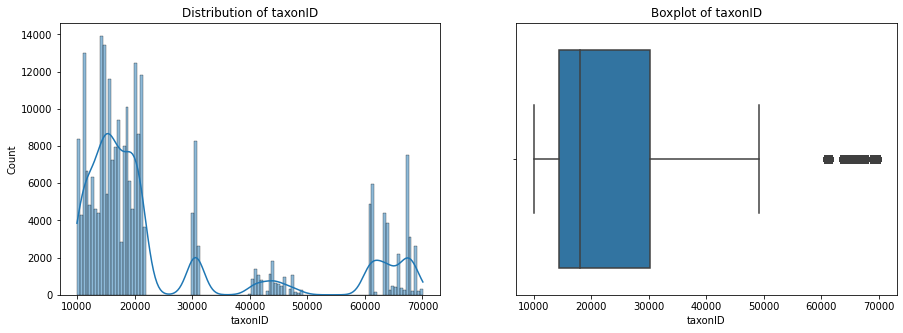

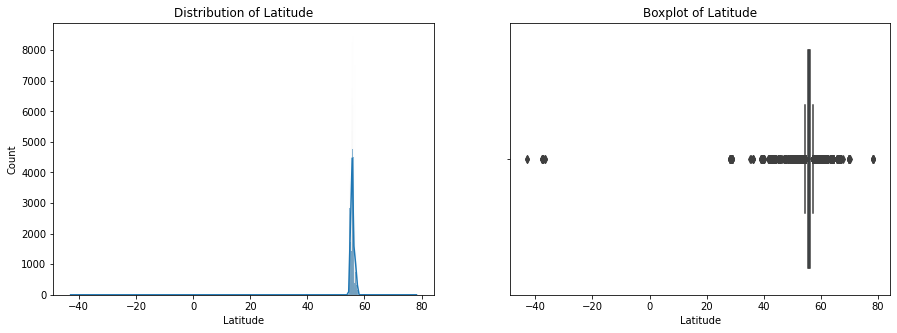

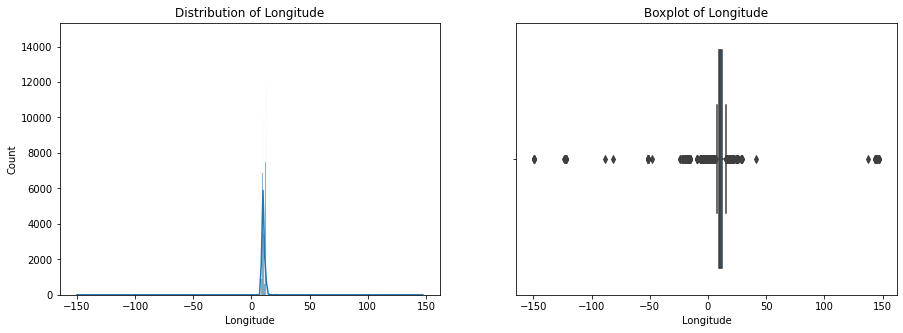

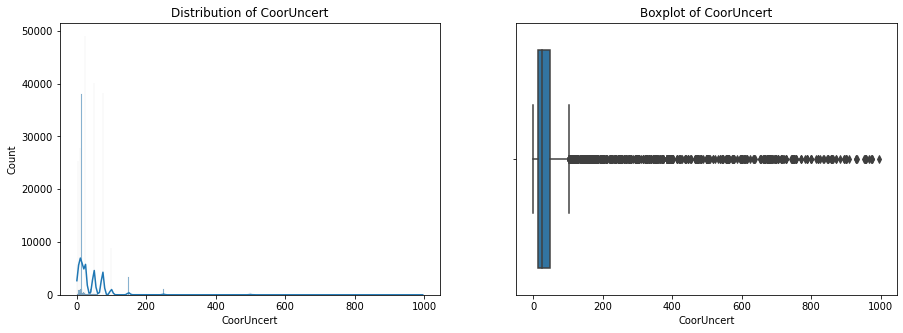

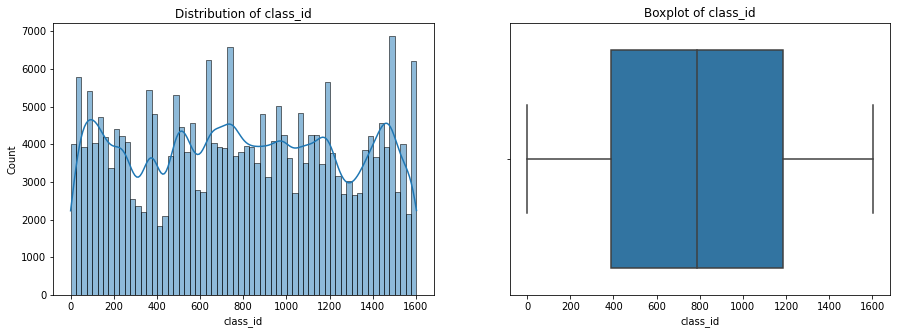

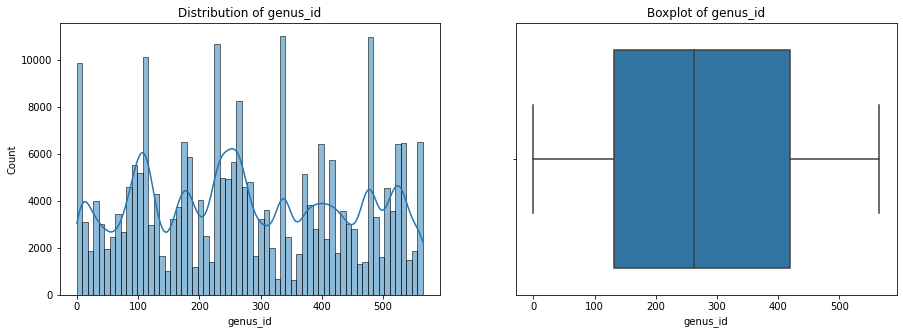

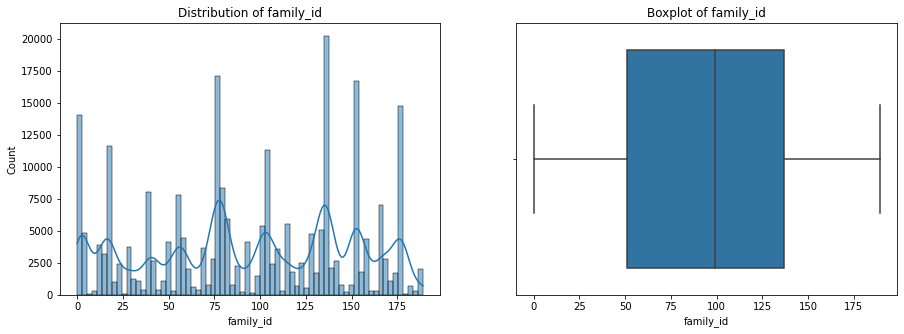

In [301]:
## Select columns, excluding objects
input_num = data_filtered.select_dtypes(exclude=["object","datetime"])
## Store the column names in a variable
num_features = input_num.columns
## Loop over all the selected columns to generate the plots
for num_feature in num_features:
   ## Generate the subplots
   fig, ax = plt.subplots(1, 2, figsize=(15,5))
   ## Generate the distribution plot
   ax[0].set_title(f"Distribution of {num_feature}")
   sns.histplot(data=data_filtered, x=num_feature, kde=True, ax = ax[0])
   ## Generate the boxplot
   ax[1].set_title(f"Boxplot of {num_feature}")
   sns.boxplot(data=data_filtered, x=num_feature, ax = ax[1])

In [302]:
print(f'{round((data_filtered[data_filtered["year"]<1999].count()/len(data_filtered))["month"],4)*100}%\
 of the data was collected before 2000, so we\'ll drop it')

data_final = data_filtered[data_filtered["year"]>1999]

0.21% of the data was collected before 2000, so we'll drop it


In [303]:
len_fin = len(data_final)

data_points_dropped = len_data-len_fin

f'We dropped {data_points_dropped} data points, which represents approximately\
 {round(data_points_dropped/len_data,2)*100}% of our dataset. Our dataset is now composed of {len_fin} images'

'We dropped 12944 data points, which represents approximately 5.0% of our dataset. Our dataset is now composed of 253400 images'

## Organizing the datasets

In [304]:
data_final['image_path'] = data_final['image_path'].map(lambda x: x.replace('/Datasets/DF20/',''))
data_final['image_path']

<ipython-input-304-64a608f47bcf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0          2238546328-30620.jpg
1          2558871973-53941.jpg
2         2238503501-245559.jpg
3         2446759075-197643.jpg
4         2238472345-167057.jpg
                  ...          
253964    2238575234-110923.jpg
253965    2238488482-318617.jpg
253966    2856918355-210091.jpg
253967    2238432527-313815.jpg
253968    2238546801-252985.jpg
Name: image_path, Length: 253400, dtype: object

In [4]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [59]:
#!ls ../../Mush_Me/data/raw_data/archives/images

!ls ../../Mush_Me/data/raw_data/pictures/00_initial/mini_train


mini_test  mini_train


In [66]:
import shutil

data1 = pd.read_csv('../../Mush_Me/data/metadata/01_initial_metadata/DanishFungi2020_mini_train_metadata.csv')

data1 = data1[['image_path']]

data1['image_path'] = data1['image_path'].map(lambda x: x.replace('/Datasets/DF20/',''))

data1

,image_path
0,2862684394-136762.jpg
1,2238502117-320693.jpg
2,2818074328-59948.jpg
3,2238560017-331396.jpg
4,2237970493-5168.jpg
...,...
32748,2901951500-218743.jpg
32749,2238549985-179895.jpg
32750,2238365543-13464.jpg
32751,2883271427-366116.jpg


In [67]:
import os

data1['image_path'] = data1['image_path'].map(lambda x: x.replace('/Datasets/DF20/',''))

paths = list(data1['image_path'])

for path in log_progress(paths, every=1):
    
    origin = os.path.join('../../Mush_Me/data/raw_data/archives/images',path)

    target = os.path.join('../../Mush_Me/data/raw_data/pictures/00_initial/mini_train',path)

    shutil.copy2(origin,target)
    

'Done'

'Done'

## Seasonality - (Useless at the moment)

In [173]:
def season(date):
    if date.month >= 12 and date.day >= 21 or date.month <= 3 and date.day < 21:
        return 1
    elif date.month >= 3 and date.day >= 21 or date.month <= 6 and date.day < 21:
        return 2
    elif date.month >= 6 and date.day >= 21 or date.month <= 9 and date.day < 21:
        return 3
    else:
        return 4

data['season_num'] = data['date'].map(lambda x: season(x))

In [174]:
data['season_cat'] = data['season_num'].map({1:'Winter',
                                            2: 'Spring',
                                            3: 'Summer',
                                            4: 'Winter'})
data['season_cat']

0         Spring
1         Winter
2         Spring
3         Spring
4         Spring
           ...  
266339    Spring
266340    Spring
266341    Summer
266342    Winter
266343    Spring
Name: season_cat, Length: 261147, dtype: object

In [175]:
dates = data[['family','month']].groupby(by='month').count().reset_index()
dates['month']= dates['month'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
                                    7:'July',8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
dates

,month,family
0,January,13454
1,February,9921
2,March,11173
3,April,9096
4,May,9314
5,June,9905
6,July,15861
7,August,26205
8,September,52924
9,October,60713


## Interactive graphs (for later)

In [170]:
from ipywidgets import interact

@interact
plt.figure(figsize=(15,8))
sns.barplot(x='month',y='family',data=dates, palette='viridis');

SyntaxError: invalid syntax (<ipython-input-170-358dfb0f0351>, line 4)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

token = open("pk.eyJ1IjoiaGFkcmk5NiIsImEiOiJja3B4cHV6d24wMDFjMzBqc29neXgyb2VqIn0.ju_WsYC12VK2eTCNNs1aCg").read()

df = px.data.election()


In [ ]:
geojson = px.data.election_geojson()
candidates = df.winner.unique()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.P("Candidate:"),
    dcc.RadioItems(
        id='candidate', 
        options=[{'value': x, 'label': x} 
                 for x in candidates],
        value=candidates[0],
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="choropleth"),
])

@app.callback(
    Output("choropleth", "figure"), 
    [Input("candidate", "value")])
def display_choropleth(candidate):
    fig = px.choropleth_mapbox(
        df, geojson=geojson, color=candidate,
        locations="district", featureidkey="properties.district",
        center={"lat": 45.5517, "lon": -73.7073}, zoom=9,
        range_color=[0, 6500])
    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_accesstoken=token)

    return fig

app.run_server(debug=True)